<a href="https://colab.research.google.com/github/Cristiand056/Pruebas-codigo-hackaton-oracle-alura/blob/main/candidato_datafarme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import os

import datetime, warnings
warnings.filterwarnings("ignore")

import kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("hrishitpatil/flight-data-2024")

print("Path to dataset files:", path)

data_path = os.path.join( path, 'flight_data_2024.csv')

Using Colab cache for faster access to the 'flight-data-2024' dataset.
Path to dataset files: /kaggle/input/flight-data-2024


In [3]:
# Download latest version
path_1 = kagglehub.dataset_download("patrickzel/flight-delay-and-cancellation-dataset-2019-2023")

print("Path to dataset files:", path_1)

data_path_1 = os.path.join( path_1, 'flights_sample_3m.csv')

Using Colab cache for faster access to the 'flight-delay-and-cancellation-dataset-2019-2023' dataset.
Path to dataset files: /kaggle/input/flight-delay-and-cancellation-dataset-2019-2023


In [4]:
def ver_df(path, columna_buscar):
    df = pd.read_csv(path)
    """
    print(f"cantidad de muestras: {df.shape[0]}")
    print(f"cantidad de columnas: {df.shape[1]}")
    #print(f'Demo del data frame: \n{df.head(15)}')
    print(f'info del data frame: \n{df.info()}')
    print(f'descripción del data frame: \n{df.describe()}')
    print(f'columnas con valores nulos: \n{df.isna().sum()}')
    print(f'cantidad de valores del data frame: \n{df[columna_buscar].value_counts()}')
    print(f"cantidad de muestras validas: \n {df.shape[0]-df[columna_buscar].isna().sum()}")"""
    return df

In [5]:
df = ver_df(data_path, 'late_aircraft_delay')

#***Limpieza del data frame***

#*Limpiado NA*

In [6]:
columnas_con_NA = ['op_carrier_fl_num', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'arr_time', 'arr_delay', 'actual_elapsed_time','actual_elapsed_time', 'air_time']

In [7]:
df.dropna(subset=columnas_con_NA, inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
columnas = df.columns
print(columnas)

Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')


In [10]:
df.head(15)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,1,1,1,2024-01-01,9E,4814.0,JFK,"New York, NY",New York,...,0,136.0,122.0,84.0,509.0,0,0,0,0,0
1,2024,1,1,1,2024-01-01,9E,4815.0,MSP,"Minneapolis, MN",Minnesota,...,0,130.0,114.0,88.0,622.0,0,0,0,0,0
2,2024,1,1,1,2024-01-01,9E,4817.0,JFK,"New York, NY",New York,...,0,106.0,90.0,61.0,288.0,0,0,0,0,0
3,2024,1,1,1,2024-01-01,9E,4817.0,RIC,"Richmond, VA",Virginia,...,0,111.0,76.0,51.0,288.0,0,0,0,0,0
4,2024,1,1,1,2024-01-01,9E,4818.0,DTW,"Detroit, MI",Michigan,...,0,79.0,70.0,45.0,237.0,0,0,0,0,0
5,2024,1,1,1,2024-01-01,9E,4822.0,JAX,"Jacksonville, FL",Florida,...,0,137.0,120.0,102.0,833.0,0,0,0,0,0
6,2024,1,1,1,2024-01-01,9E,4822.0,LGA,"New York, NY",New York,...,0,169.0,164.0,125.0,833.0,0,0,0,0,0
7,2024,1,1,1,2024-01-01,9E,4823.0,CHS,"Charleston, SC",South Carolina,...,0,118.0,99.0,86.0,641.0,0,0,0,0,0
8,2024,1,1,1,2024-01-01,9E,4823.0,LGA,"New York, NY",New York,...,0,149.0,123.0,101.0,641.0,0,0,0,0,0
9,2024,1,1,1,2024-01-01,9E,4828.0,ITH,"Ithaca/Cortland, NY",New York,...,0,79.0,67.0,43.0,189.0,0,0,0,0,0


#*Convertir de millas a km el campo dist*

In [11]:
df['distancia_km'] = df['distance'] * 1.60934

In [12]:
df.head(15)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,distancia_km
0,2024,1,1,1,2024-01-01,9E,4814.0,JFK,"New York, NY",New York,...,136.0,122.0,84.0,509.0,0,0,0,0,0,819.15406
1,2024,1,1,1,2024-01-01,9E,4815.0,MSP,"Minneapolis, MN",Minnesota,...,130.0,114.0,88.0,622.0,0,0,0,0,0,1001.00948
2,2024,1,1,1,2024-01-01,9E,4817.0,JFK,"New York, NY",New York,...,106.0,90.0,61.0,288.0,0,0,0,0,0,463.48992
3,2024,1,1,1,2024-01-01,9E,4817.0,RIC,"Richmond, VA",Virginia,...,111.0,76.0,51.0,288.0,0,0,0,0,0,463.48992
4,2024,1,1,1,2024-01-01,9E,4818.0,DTW,"Detroit, MI",Michigan,...,79.0,70.0,45.0,237.0,0,0,0,0,0,381.41358
5,2024,1,1,1,2024-01-01,9E,4822.0,JAX,"Jacksonville, FL",Florida,...,137.0,120.0,102.0,833.0,0,0,0,0,0,1340.58022
6,2024,1,1,1,2024-01-01,9E,4822.0,LGA,"New York, NY",New York,...,169.0,164.0,125.0,833.0,0,0,0,0,0,1340.58022
7,2024,1,1,1,2024-01-01,9E,4823.0,CHS,"Charleston, SC",South Carolina,...,118.0,99.0,86.0,641.0,0,0,0,0,0,1031.58694
8,2024,1,1,1,2024-01-01,9E,4823.0,LGA,"New York, NY",New York,...,149.0,123.0,101.0,641.0,0,0,0,0,0,1031.58694
9,2024,1,1,1,2024-01-01,9E,4828.0,ITH,"Ithaca/Cortland, NY",New York,...,79.0,67.0,43.0,189.0,0,0,0,0,0,304.16526


In [13]:
aerolineas = {'9E': 'Endeavor Air', 'AA': 'American Airlines', 'AS': 'Alaska Airlines', 'B6': 'JetBlue Airways', 'DL': 'Delta Air Lines', 'F9': 'Frontier Airlines', 'G4': 'Allegiant Air', 'HA': 'Hawaiian Airlines', 'MQ': 'Envoy Air', 'NK': 'Spirit Airlines', 'OH': 'PSA Airlines', 'OO': 'SkyWest Airlines', 'UA': 'United Airlines', 'WN': 'Southwest Airlines', 'YX': 'Republic Airways'}

In [14]:
df['retraso'] = np.where(df['arr_delay']>0, 1, 0)

In [15]:
df.sample(15)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,distancia_km,retraso
671355,2024,2,8,4,2024-02-08,AA,2212.0,DFW,"Dallas/Fort Worth, TX",Texas,...,222.0,201.0,1430.0,0,0,0,0,0,2301.35620,0
1374212,2024,3,17,7,2024-03-17,DL,2527.0,ATL,"Atlanta, GA",Georgia,...,114.0,88.0,746.0,0,0,0,0,0,1200.56764,0
1257718,2024,3,11,1,2024-03-11,DL,1398.0,DCA,"Washington, DC",Virginia,...,170.0,147.0,931.0,0,0,0,0,0,1498.29554,0
6552462,2024,12,4,3,2024-12-04,AA,784.0,CID,"Cedar Rapids/Iowa City, IA",Iowa,...,134.0,106.0,685.0,0,0,0,0,0,1102.39790,1
5545900,2024,10,13,7,2024-10-13,NK,214.0,FLL,"Fort Lauderdale, FL",Florida,...,191.0,155.0,1119.0,39,0,0,0,0,1800.85146,1
189715,2024,1,11,4,2024-01-11,OO,4117.0,ATL,"Atlanta, GA",Georgia,...,55.0,35.0,147.0,0,0,0,0,0,236.57298,1
1594670,2024,3,28,4,2024-03-28,UA,2319.0,MSY,"New Orleans, LA",Louisiana,...,176.0,158.0,1062.0,0,0,0,0,0,1709.11908,0
2341887,2024,5,6,1,2024-05-06,B6,1431.0,BOS,"Boston, MA",Massachusetts,...,66.0,41.0,184.0,0,0,0,0,0,296.11856,0
6907411,2024,12,22,7,2024-12-22,WN,3015.0,SAN,"San Diego, CA",California,...,90.0,73.0,480.0,0,0,0,0,0,772.48320,1
6513655,2024,12,2,1,2024-12-02,AA,818.0,ORD,"Chicago, IL",Illinois,...,188.0,145.0,1197.0,0,0,0,0,0,1926.37998,0


In [16]:
#columnas_basura = ['cancellation_code', 'distance', 'fl_date', 'cancelled', 'arr_delay']
"""nuevos_nombres_columnas = {'op_unique_carrier':'codigo_unico_aerolinea',
                              'dest':'codigo_destino',
                              'dep_time':'hora_salida',
                              'year':'año',
                              'month':'mes',
                              'day_of_month':'dia_mes',
                              'origin':'codigo_origen',
                              }
"""
#df.drop(columns=columnas_basura, inplace=True)

"nuevos_nombres_columnas = {'op_unique_carrier':'codigo_unico_aerolinea',\n                              'dest':'codigo_destino',\n                              'dep_time':'hora_salida',\n                              'year':'año',\n                              'month':'mes',\n                              'day_of_month':'dia_mes',\n                              'origin':'codigo_origen',\n                              }\n"

##**Exploración**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = df['retraso'].groupby(df['op_unique_carrier']).value_counts()
data

op_unique_carrier  retraso
9E                 0          144070
                   1           51002
AA                 0          561389
                   1          404727
AS                 0          140780
                   1           99543
B6                 0          144132
                   1           91551
DL                 0          682270
                   1          315576
F9                 0          114601
                   1           88880
G4                 0           74877
                   1           40005
HA                 0           44286
                   1           33347
MQ                 0          173870
                   1          101447
NK                 0          159000
                   1           96633
OH                 0          141158
                   1           82515
OO                 0          485665
                   1          248221
UA                 0          490577
                   1          255241
WN                 0          867079
                   1          537518
YX                 0          219504
                   1           75802
Name: count, dtype: int64

Text(0, 0.5, 'Cantidad de vuelos')

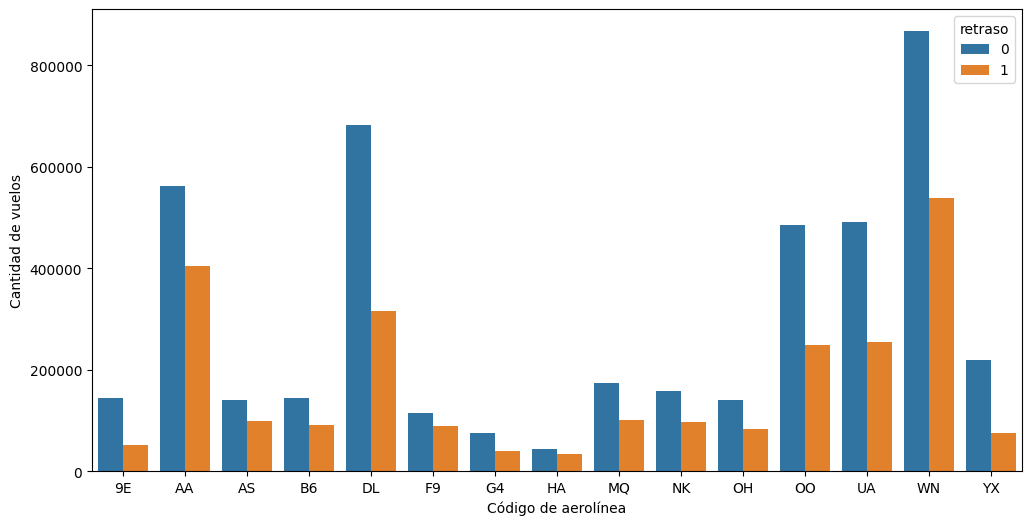

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data.index.get_level_values(0), y=data.values, hue=data.index.get_level_values(1))
plt.xlabel('Código de aerolínea')
plt.ylabel('Cantidad de vuelos')

In [20]:
data = df['retraso'].groupby(df['origin']).value_counts()
data

origin  retraso
ABE     0           3178
        1           1069
ABI     0           1177
        1            564
ABQ     0          16148
                   ...  
XWA     1            611
YAK     0            512
        1            187
YUM     0           1237
        1            474
Name: count, Length: 696, dtype: int64

In [21]:
top10_origen = data.nlargest(10)
top10_origen

,,count
origin,retraso,
ATL,0,214317
DEN,0,184443
DFW,0,175257
ORD,0,167553
DFW,1,131615
LAX,0,125211
ATL,1,123345
PHX,0,122364
DEN,1,119880


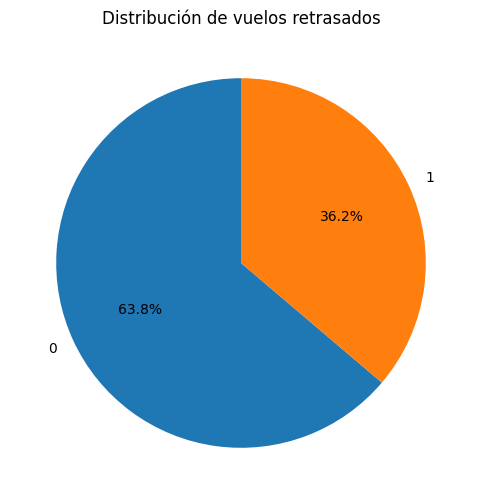

In [22]:
data = df['retraso'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de vuelos retrasados')
plt.show()

Text(0, 0.5, 'Cantidad de vuelos')

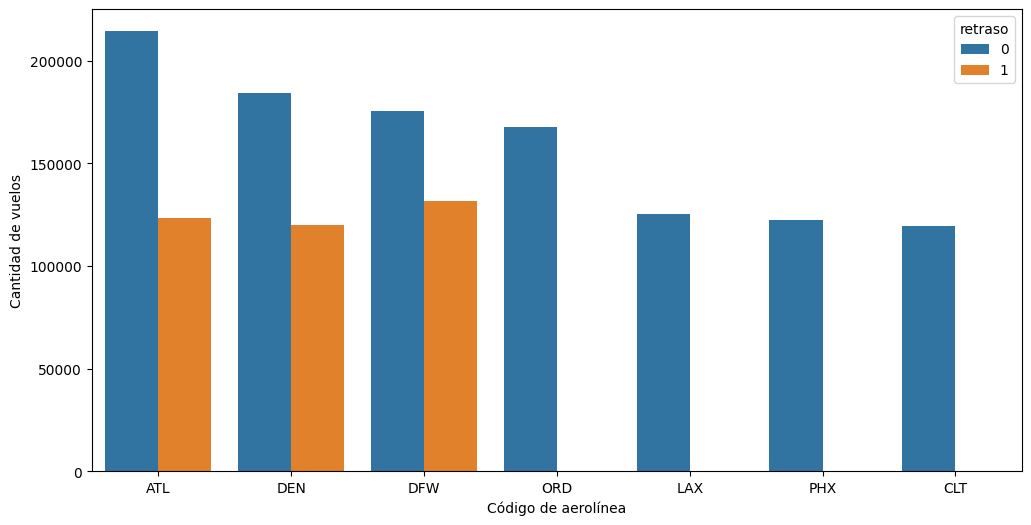

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_origen.index.get_level_values(0), y=top10_origen.values, hue=top10_origen.index.get_level_values(1))
plt.xlabel('Código de aerolínea')
plt.ylabel('Cantidad de vuelos')

In [24]:
y = df['retraso']
X = df.drop(['retraso'], axis=1)

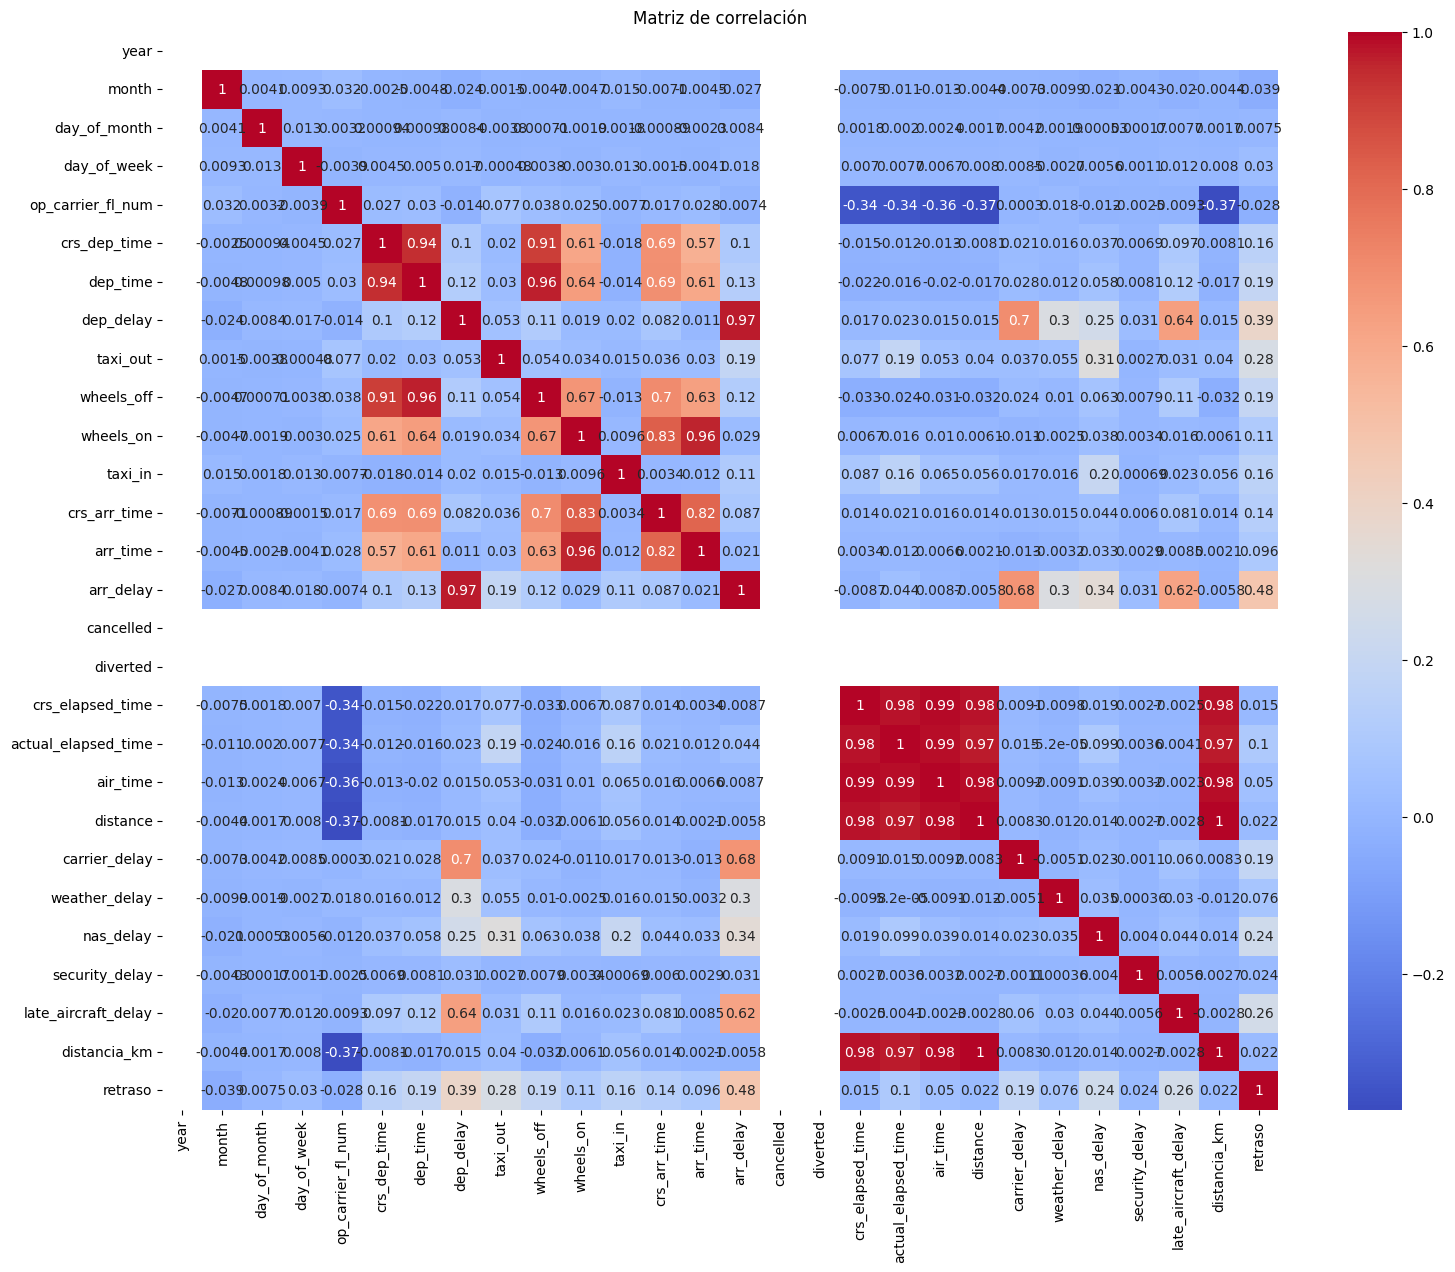

In [25]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

#**Preproceso**

In [26]:
from sklearn.compose import make_column_selector as selector

In [27]:
cat_selector = selector(dtype_include=['object', 'category'])
variables_categoricas = cat_selector(df)

In [28]:
print(variables_categoricas)

['fl_date', 'op_unique_carrier', 'origin', 'origin_city_name', 'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm', 'cancellation_code']


In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [30]:
one_hot = make_column_transformer(
    (OneHotEncoder(
        drop="if_binary",
        handle_unknown="ignore",
        sparse_output=True  # 1. Aseguramos que el encoder genere sparse
    ), variables_categoricas),
    remainder="passthrough",
    sparse_threshold=1.0     # 2. Forzamos al transformador a mantener el formato sparse
)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix, ConfusionMatrixDisplay, r2_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [33]:
model_arbol = Pipeline(steps=[
    ("preprocessor", one_hot),
    ("classifier", RandomForestClassifier(random_state=200, class_weight="balanced", max_depth=5))
])

In [ ]:
model_arbol.fit(X_train, y_train)

In [ ]:
y_pred = model_arbol.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
visualizacion = ConfusionMatrixDisplay(matrix, display_labels=['Retraso (NO)', 'Retraso (SI)'])
visualizacion.plot()